In [1]:
import tensorflow as tf
from tqdm import trange  # for progress bar
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 

In [5]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
# Reshaping for 4-dim np-array
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
# Normalizing RGB
X_train /= 255
X_test /= 255

In [12]:
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

Using TensorFlow backend.


In [13]:
model = Sequential()
# adding the first layer specifying input units (features)
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax)) # the final layer for 10 classes of digits

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=X_train, y=Y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 37s 611us/step - loss: 0.2037 - accuracy: 0.9384
Epoch 2/10
60000/60000 [==============================] - 42s 696us/step - loss: 0.0828 - accuracy: 0.9744
Epoch 3/10
60000/60000 [==============================] - 47s 781us/step - loss: 0.0566 - accuracy: 0.9821
Epoch 4/10
60000/60000 [==============================] - 41s 681us/step - loss: 0.0434 - accuracy: 0.9862
Epoch 5/10
60000/60000 [==============================] - 40s 669us/step - loss: 0.0356 - accuracy: 0.9884
Epoch 6/10
60000/60000 [==============================] - 39s 656us/step - loss: 0.0300 - accuracy: 0.9902
Epoch 7/10
60000/60000 [==============================] - 40s 665us/step - loss: 0.0274 - accuracy: 0.9906
Epoch 8/10
60000/60000 [==============================] - 40s 661us/step - loss: 0.0233 - accuracy: 0.9919
Epoch 9/10
60000/60000 [==============================] - 47s 777us/step - loss: 0.0181 - accuracy: 0.9937
Epoch 10/10
60000/60000 [============

In [15]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 2s 188us/step


[0.06362377418418291, 0.9839000105857849]

7


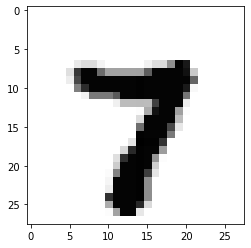

In [21]:
image_index = 1100
plt.imshow(X_test[image_index].reshape(28, 28), cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())